In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Update the path to your uploaded image
image_path = "./img.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = img.astype(np.int32)


1080 1920


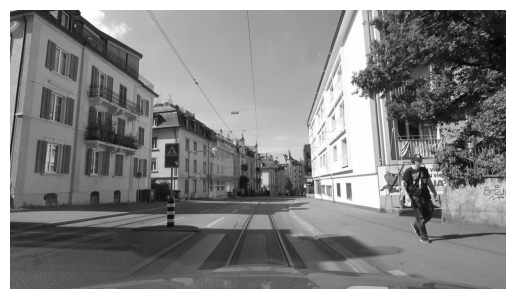

In [8]:
i_transformed = np.copy(img)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
i = img
print(size_x,size_y)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

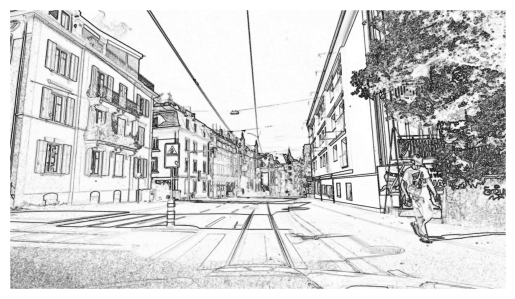

In [9]:
# Define Sobel-x and Sobel-y filters
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Initialize output images
i_transformed_x = np.zeros_like(img)
i_transformed_y = np.zeros_like(img)

# Manual convolution (keep as is for practice)
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        region = img[x-1:x+2, y-1:y+2]
        i_transformed_x[x, y] = np.sum(region * sobel_x)
        i_transformed_y[x, y] = np.sum(region * sobel_y)

# Calculate magnitude of gradient (overall edge strength)
edges = np.sqrt(i_transformed_x**2 + i_transformed_y**2)

# Normalize and convert to uint8
edges = np.clip(edges, 0, 255).astype(np.uint8)

edges_inverted = 255 - edges
plt.imshow(edges_inverted, cmap='gray')
plt.axis('off')
plt.show()

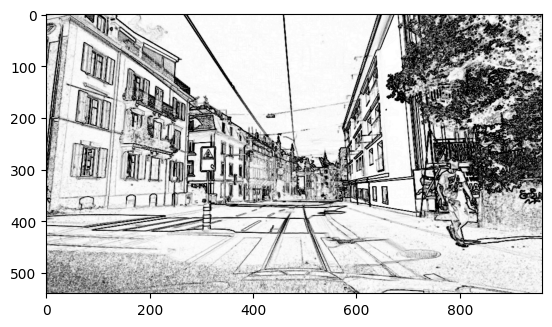

In [12]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(edges[x, y])
    pixels.append(edges[x+1, y])
    pixels.append(edges[x, y+1])
    pixels.append(edges[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
invertendo = 255 - newImage
plt.gray()
plt.grid(False)
plt.imshow(invertendo)
#plt.axis('off')
plt.show()